In [169]:
import math

from cmath import exp
from math import atan
import numpy as np

import matplotlib.pyplot as plt

In [170]:
k1 = k3 = k5 = 0
x2 = x4 = 0
w2 = w4 = 0

i = 1j

phi1 = phi2 = phi3 = phi4 = phi5 = 0

In [171]:
me = 9.1093837e-31  # Kg
# me = 1.60217663e-19  # Coulombs
hbar = 1.054571817e-34  # Js
# hbar = 6.582119569e-16  # eV s

def k(E, V, m=me):
    return np.sqrt(2 * m * (E - V)) / hbar

def X(E, V, m=me):
    return np.sqrt(2 * m * (V - E)) / hbar

In [172]:
def K(k1: float, k3: float, k5: float, x2: float, x4: float, w2: float, w3: float, w4: float) -> complex:

    phi1 = k3 * w3
    phi2 = np.arctan(x2 / k1)
    phi3 = np.arctan(x2 / k3)
    phi4 = np.arctan(x4 / k3)
    phi5 = np.arctan(x4 / k5)

    return \
        np.exp(x2 * w2 + x4 * w4) \
        * (np.exp(i * (- phi1 + phi2 + phi3 + phi4 + phi5)) - np.exp(i * (phi1 + phi2 - phi3 - phi4 + phi5))) \
        + np.exp(x2 * w2 - x4 * w4) \
        * (- np.exp(i * (- phi1 + phi2 + phi3 - phi4 - phi5)) + np.exp(i * (phi1 + phi2 - phi3 + phi4 - phi5))) \
        + np.exp(- x2 * w2 + x4 * w4) \
        * (- np.exp(i * (- phi1 - phi2 - phi3 + phi4 + phi5)) + np.exp(i * (phi1 - phi2 + phi3 - phi4 + phi5))) \
        + np.exp(- x2 * w2 - x4 * w4) \
        * (- np.exp(i * (- phi1 - phi2 - phi3 - phi4 - phi5)) + np.exp(i * (phi1 - phi2 + phi3 + phi4 - phi5)))

def T(k1: float, k3: float, k5: float, x2: float, x4: float, w2: float, w3: float, w4: float) -> float:

    K_ = K(k1, k3, k5, x2, x4, w2, w3, w4)
    Ksq = K_.conjugate() * K_

    return \
        ((((2 ** 8) * k1 * ((x2 * k3 * x4) ** 2 ) * k5 ) \
        / (Ksq * (k1**2 + x2**2) * (k3**2 + x2**2) * (k3**2 + x4**2) * (k5**2 + x4**2)))).real


## 4.1. Transmission of a symmetric double barrier

1. Write a computer program with the software of your choice, to find the transmission coefficient of a symmetric double barrier and
   transmission resonances (bound states energies of the double barrier
   well). In the calculation use the expression of T given in page 4, Eq.1.
   Use the parameters given in Fig. 8. Use the following masses, 0.067me for
   the electron mass m* in left region, well and right region (effective mass of GaAs)
   and the same mass 0.067me for the GaAlAs barriers; me being the bare electron mass.


In [173]:

def V(x: float) -> float:
    """Computes the potential of the exercise.

    Parameters
    ----------
    x : float
        Position in `m` at which the potential is computed.

    Returns
    -------
    float
        Potential in `eV`.
    """

    return 0 if x < 0.2e-9 or 0.6e-9 < x < 1.2e-9 or 1.6e-9 < x else 1


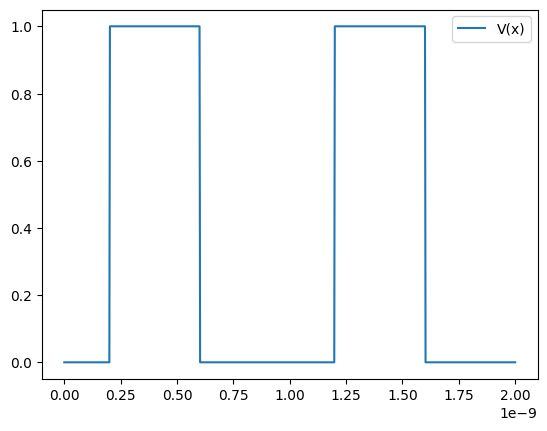

In [174]:

x_ = np.arange(0e-9, 2e-9, 0.0025e-9)
plt.plot(x_, [V(xi) for xi in x_], label=f'V(x)')
plt.legend()
plt.show()

In [194]:
def T_at(E):

    E_ = E * 1.6e-19

    m = me
    k1 = k3 = k5 = k(E_, 0, m)
    x2 = x4 = X(E_, 1.6e-19, m)
    w2 = w4 = 0.4e-9
    w3 = 0.6e-9

    return T(k1, k3, k5, x2, x4, w2, w3, w4)


0.9776970640808779 0.35850000000000015


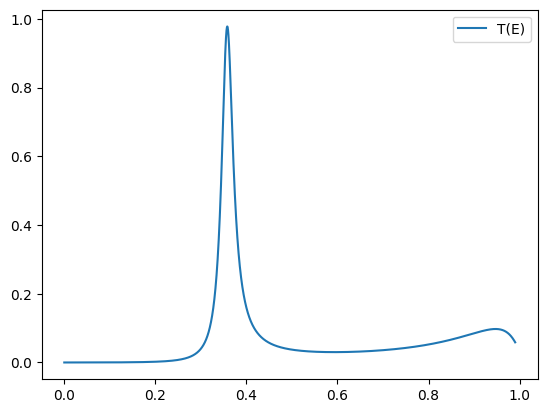

In [195]:

E = np.arange(0.001, 0.99, 0.0001)
T_at_E = tuple(T_at(Ei) for Ei in E)

print(max(T_at_E), E[T_at_E.index(max(T_at_E))])

plt.plot(E, T_at_E, label=f'T(E)')
plt.legend()
plt.show()

2. Represent in a graph the obtained results for the transmission
   coefficient and obtain the energy of the possible well resonances that
   would correspond to the energy of the electron bound states inside
   the well. See Fig.3 as an example.

In [177]:
# T_ = T(k1, k3, k5, x2, x4, w2, w3, w4)

## 4.2.Transmission of an asymmetric double barrier

1. Case (a) Unequal double barrier (see Fig. 9)
   Using the previous computer program, repeat the calculation for the
   asymmetric double barrier using the same electron masses. Use the
   parameters presented in Fig. 9. Represent the transmission coefficient
   vs energy and obtain the resonances. 

In [201]:

def T2_at(E):

    V2 = 0.5 * 1.6e-19
    V4 = 1.13 * 1.6e-19
    m = 0.067 * me

    E_ = E * 1.6e-19

    k1 = k3 = k5 = k(E_, 0, m)
    x2 = X(E_, V2, m)
    x4 = X(E_, V4, m)
    w2 = 4e-9
    w3 = 3.6e-9
    w4 = 3e-9

    return T(k1, k3, k5, x2, x4, w2, w3, w4)

0.32505858036488455


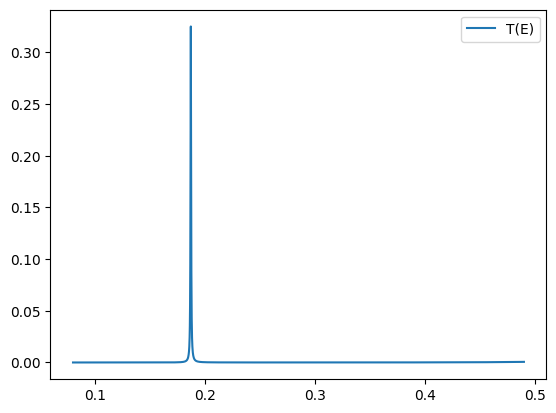

In [202]:

E = np.arange(0.08, 0.49, 0.0001)
T2_at_E = tuple(T2_at(Ei) for Ei in E)

print(max(T2_at_E))

plt.plot(E, T2_at_E, label=f'T(E)')
plt.legend()
plt.show()

2. Case (b) External bias (see Fig. 10)
   Repeat the calculation but now apply a uniform electric field across
   the double barrier and single well structure as shown in the Fig. 10.
   Consider that the right barrier is 3 nm thick, the left one 4 nm thick
   and the well width is 4 nm. The right-hand edge of the 3 nm-thick
   barrier is at a potential −0_63eV below the left-hand edge of the 4 nm-thick barrier. Comment on the changes in transmission you
   observe.

In [180]:
w2 = 4e-9
w4 = 3e-9

In [181]:

def V(x: float) -> float:
    """Computes the potential of the exercise.

    Parameters
    ----------
    x : float
        Position in `m` at which the potential is computed.

    Returns
    -------
    float
        Potential in `eV`.
    """

    if x < 1e-9:
        return 0

    elif 1e-9 <= x < 5e-9:
        return 0.4  # Mean of the top vertices of the potential barrier

    elif 5e-9 <= x < 9e-9:  # Recycling the start of the second potential barrier from the last potential.
        return -0.4 # Mean of the bottom vertices of the potential barrier

    elif 9e-9 <= x < 12e-9:
        return 0.6

    else:
        return -0.63


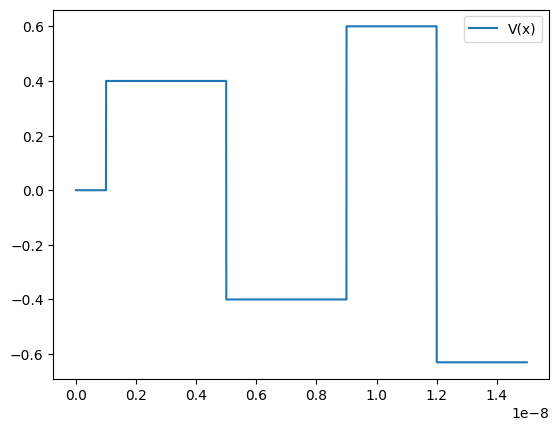

In [182]:
x_ = np.arange(0e-9, 15e-9, 0.0025e-9)
plt.plot(x_, [V(xi) for xi in x_], label=f'V(x)')
plt.legend()
plt.show()

In [203]:

def T3_at(E):
    m = 0.067 * me
    E_ = E * 1.6e-19

    k1 = k(E_, 0, m)
    k3 = k(E_, 0.4*1.6e-19, m)
    k5 = k(E_, 0.6*1.6e-19, m)
    x2 = X(E_, -0.4*1.6e-19, m)
    x4 = X(E_, -0.6*1.6e-19, m)
    w2 = 4e-9
    w3 = 3.6e-9
    w4 = 3e-9

    return T(k1, k3, k5, x2, x4, w2, w3, w4)

0.32505858036488455


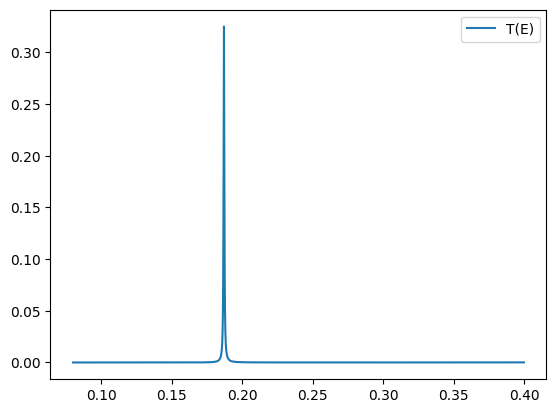

In [204]:

E = np.arange(0.08, 0.4, 0.0001)
T3_at_E = tuple(T2_at(Ei) for Ei in E)

print(max(T3_at_E))

plt.plot(E, T3_at_E, label=f'T(E)')
plt.legend()
plt.show()